In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score

In [18]:
# Load and preprocess the Iris dataset
iris=load_iris()
X = iris['data']
y = iris['target']
#These names are often used for labeling plots, displaying information, or performing other operations related to the dataset.
names = iris['target_names']
feature_names = iris['feature_names']

In [3]:
enc = OneHotEncoder()
scaler = StandardScaler()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

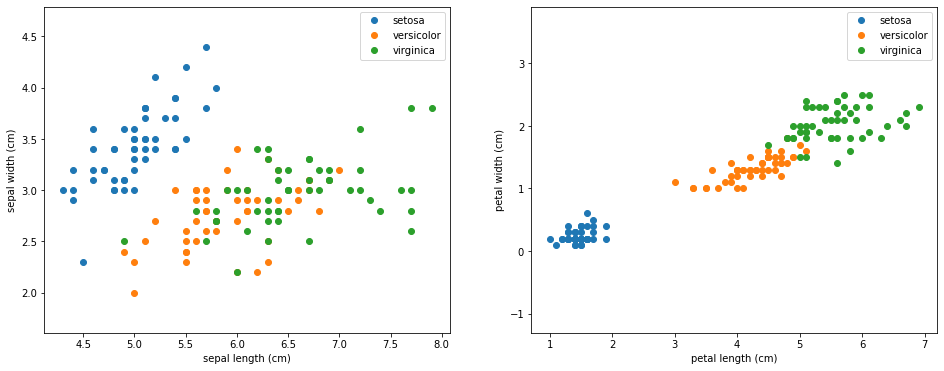

In [19]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [5]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
y_train = enc.fit_transform(y_train[:, np.newaxis]).toarray()

In [7]:
# Define the adaptive activation function
k0 = tf.Variable(tf.random.uniform([1]))
k1 = tf.Variable(tf.random.uniform([1]))

In [8]:
# Define the adaptive activation function
def adaact(x):
    return k0 + k1 * x

In [9]:
# Build the model
model = Sequential()
model.add(Dense(25, input_dim=4, activation=adaact))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                125       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 78        
                                                                 
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.4814 - accuracy: 0.2333
Epoch 2/100
4/4 [==============================] - 0s 0s/step - loss: 1.4254 - accuracy: 0.2750
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 1.3291 - accuracy: 0.3167
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2526 - accuracy: 0.3500
Epoch 5/100
4/4 [==============================] - 0s 0s/step - loss: 1.2891 - accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2165 - accuracy: 0.3667
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2149 - accuracy: 0.2833
Epoch 8/100
4/4 [==============================] - 0s 0s/step - loss: 1.1594 - accuracy: 0.3500
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1483 - accuracy: 0.3833
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1052 - accuracy: 0.3917
Epoch 11/100
4/4 [==============

In [12]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, enc.transform(y_test[:, np.newaxis]).toarray(), verbose=0)

In [13]:
# Calculate F1-score
y_pred = np.argmax(model.predict(X_test), axis=1)
f1_score = f1_score(y_test, y_pred, average='weighted')

1/1 [==============================] - 0s 141ms/step


In [14]:
# Print the results
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('F1-Score:', f1_score)

Train Loss: 0.3355504274368286
Train Accuracy: 0.925000011920929
Test Loss: 0.2992211878299713
Test Accuracy: 0.9666666388511658
F1-Score: 0.9664109121909632


In [20]:
# Print the final parameters
for i, layer in enumerate(model.layers):
    print("Layer", i+1, "Weights:", layer.get_weights())

Layer 1 Weights: [array([[-0.03241419,  0.06323232, -0.5251813 , -0.5508379 ,  0.6695927 ,
         0.67966586, -0.12863839, -0.1380339 , -0.36790332,  0.60232514,
         0.39393046, -0.25050843,  0.18857576,  0.2321799 , -0.07231292,
         0.08605574, -0.87122136,  0.30912322, -0.22990072,  0.65520304,
         0.00721117, -0.219563  , -0.18520805,  0.5467736 ,  0.28991702],
       [-0.1138123 ,  0.46846086,  0.31527907,  0.28344902, -0.24774918,
        -0.22232524, -0.42524648, -0.31811833, -0.10704511, -0.73135936,
        -0.05162938, -0.12164974, -0.41012177, -0.33865404,  0.39924127,
        -0.6409351 ,  0.79629993, -0.24874961,  0.54156125, -0.31213963,
        -0.16219048,  0.05946772,  0.71325696,  0.02347798, -0.34957743],
       [ 0.16470991, -0.16692843, -0.45954424, -0.06306731,  0.6689725 ,
         0.09302647,  0.4882966 , -0.1821746 , -0.608099  ,  0.8532478 ,
         0.6311259 , -0.0693694 ,  0.2996857 ,  0.7986915 ,  0.6334335 ,
         0.6569668 , -0.8403172

In [29]:
# Get the loss values from the history object
loss_values = history.history['loss']

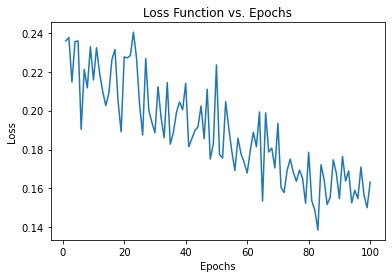

In [30]:
# Plot the loss function vs. epochs
plt.plot(range(1, len(loss_values) + 1), loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function vs. Epochs')
plt.show()

In [27]:
# Get the training accuracy values from the history object
accuracy_values = history.history['accuracy']

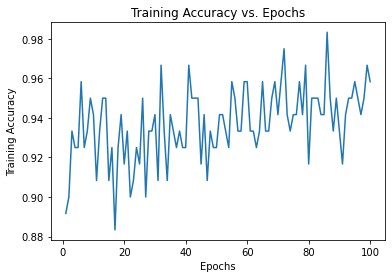

In [28]:
# Plot the training accuracy vs. epochs
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.show()